In [1]:
import pandas as pd

dataset = pd.read_csv('./processed_dataset.csv')
dataset.head()

,processed_text,compound_score,sentiment
0,nitish kumar exit affect india bloc poll prosp...,0.3182,positive
1,md ashneer grover wife move delhi hc challengi...,-0.3818,negative
2,tripurasundari express suffers technical malfu...,-0.5719,negative
3,hemant soren live updates coalition mlas set f...,-0.7269,negative
4,puja cellar gyanvapi mosque committee knocks a...,0.8689,positive


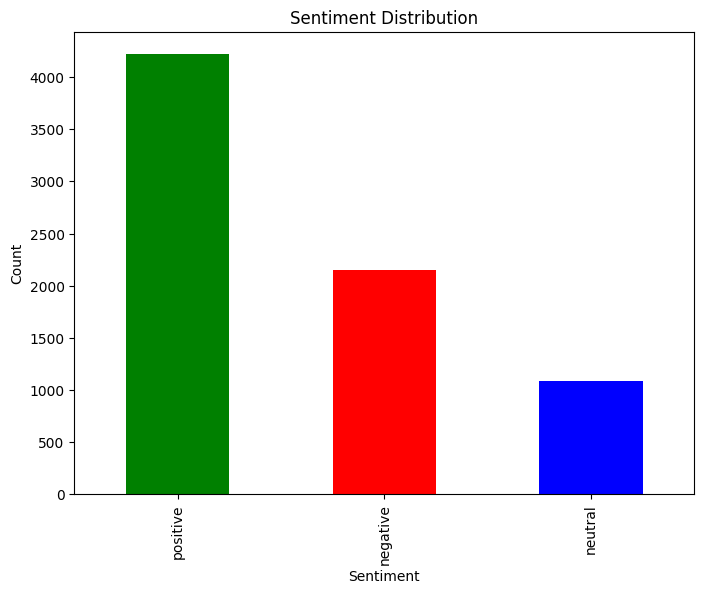

In [2]:
import matplotlib.pyplot as plt

sentiment_counts = dataset['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['label'] = label_encoder.fit_transform(dataset['sentiment'])

dataset

,processed_text,compound_score,sentiment,label
0,nitish kumar exit affect india bloc poll prosp...,0.3182,positive,2
1,md ashneer grover wife move delhi hc challengi...,-0.3818,negative,0
2,tripurasundari express suffers technical malfu...,-0.5719,negative,0
3,hemant soren live updates coalition mlas set f...,-0.7269,negative,0
4,puja cellar gyanvapi mosque committee knocks a...,0.8689,positive,2
...,...,...,...,...
7457,buy shah rukh khan iconic pathaan shirt shah r...,0.0000,neutral,1
7458,find anna wintour morning routine revealing mo...,0.0000,neutral,1
7459,raksha bandhan makeup festive occasion already...,0.9545,positive,2
7460,raksha bandhan wishes images quotes status mes...,0.9042,positive,2


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset['processed_text'], dataset['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Linear SVC
svm_classifier = LinearSVC(dual='auto')
svm_classifier.fit(X_train_tfidf, y_train)

y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')

# K Nearest Neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=120, metric='cosine')
knn_classifier.fit(X_train_tfidf, y_train)

y_pred_knn = knn_classifier.predict(X_test_tfidf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn}')

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=78, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = rf_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')


Accuracy: 0.62357669122572
SVM Accuracy: 0.7287340924313462
KNN Accuracy: 0.6155391828533154
Random Forest Accuracy: 0.695244474212994


Based on all the above models, it seems intuitive to use Support Vector Machine algorithm for the project.

In [5]:
import joblib

joblib.dump(label_encoder, 'label_encoder.joblib')
joblib.dump(svm_classifier, 'svm_sentiment_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']